# Project 6 - Advertising Sales Channel Prediction

# Description:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

# Importing all the necessary Libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the Data Set:

In [8]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


There are around 200 rows and 5 columns in which the Tv,radio and newspaper channels are the features of the column and sales is the label.

Since, the label is in contunous form Regression model is used.

further,the unamed column is eleminated due to it is unnecessary for further prediction.

In [12]:
df=df.drop(columns=['Unnamed: 0'])#dropping the unrequired column.

In [13]:
df.dtypes #checking the data type fo each column.

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [15]:
df.info() #getting the information regarding features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df.shape # typing the shape of the data

(200, 4)

In [17]:
#Checking the null count of all the columns of the data set:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Graphical analysis of the data:

NormalDistributionCurve of  Tv,radio,newspaper and sales


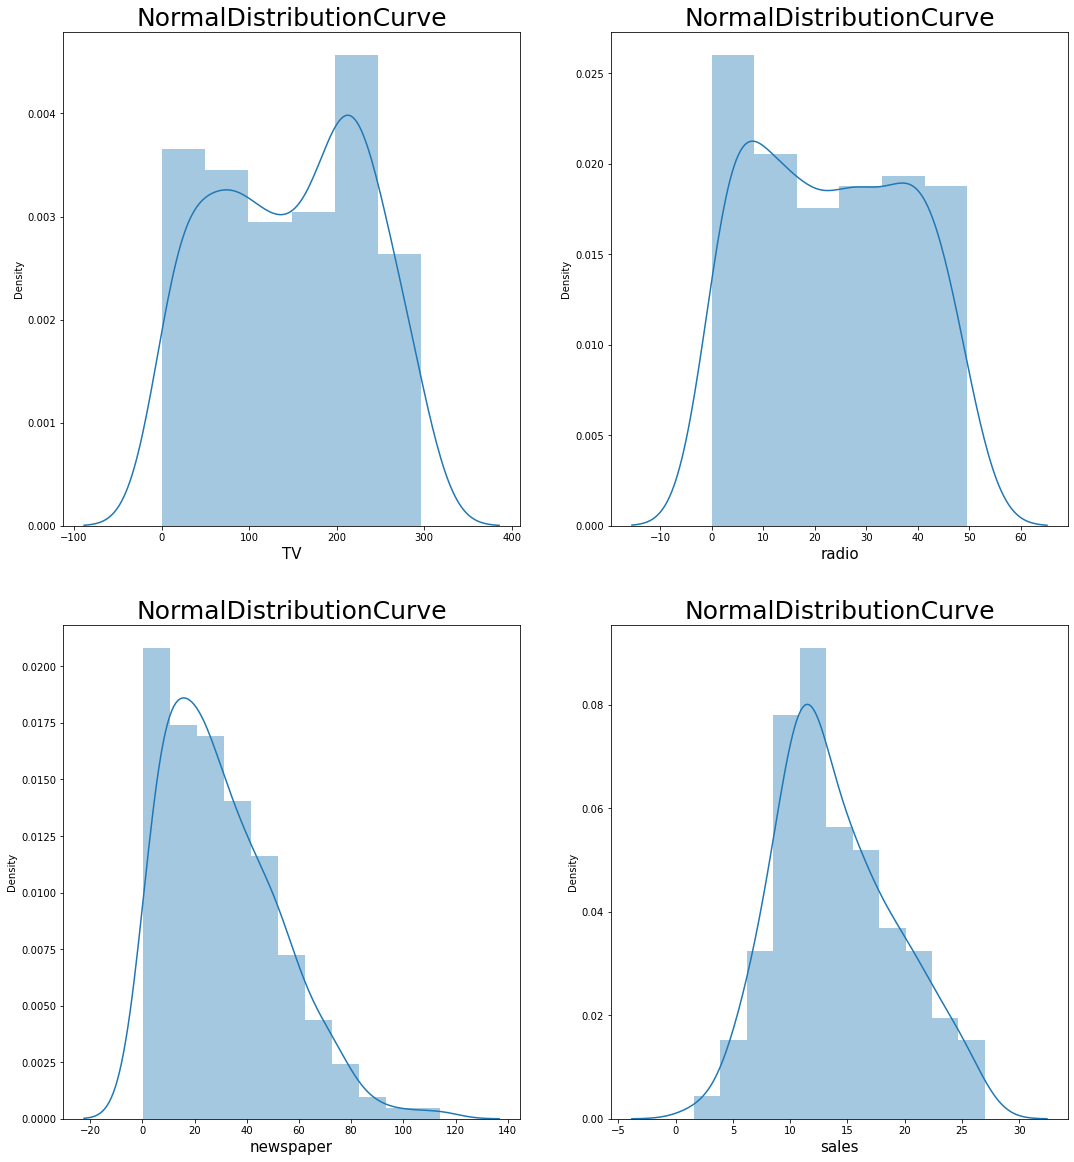

In [35]:
print('NormalDistributionCurve of  Tv,radio,newspaper and sales')
plt.figure(figsize=(18,20))
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        plt.title('NormalDistributionCurve',fontsize=25)
    plotnumber+=1

plt.show() 


# Describing Data:

In [36]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Based on the above data ,we need to check the outliers and skewness of all the columns. Now let's check the correlation of all the feature variable with the target.

# Correlation:

# Correlation Using Heat Map:

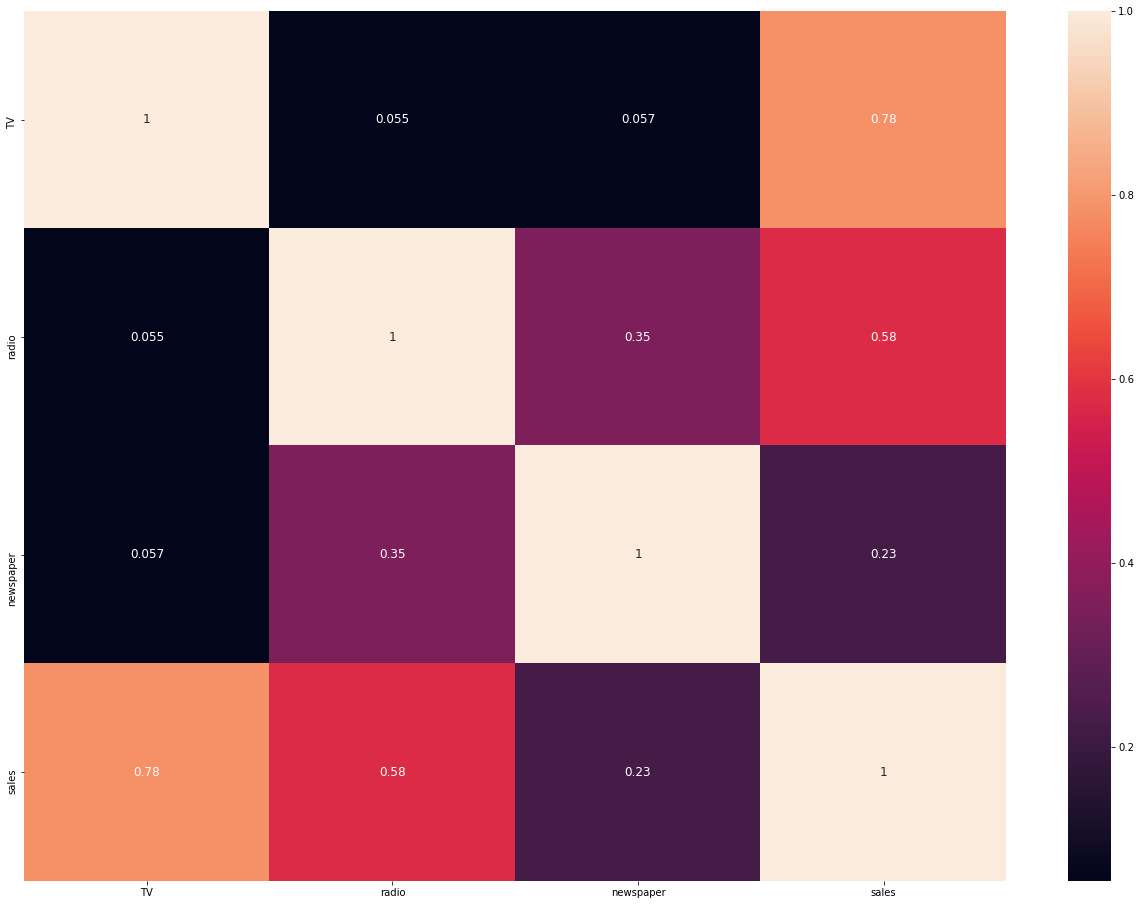

In [37]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()  

Outcome of Correlation:
All the features of the dataset is positively correlated with the target column 'sales'.

Maximun correlated feature:Tv

minimun correlated feature:newspaper

In [38]:
corr=df.corr()
corr['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

# Correlation of sales variable with all the other feature variables in the data set:

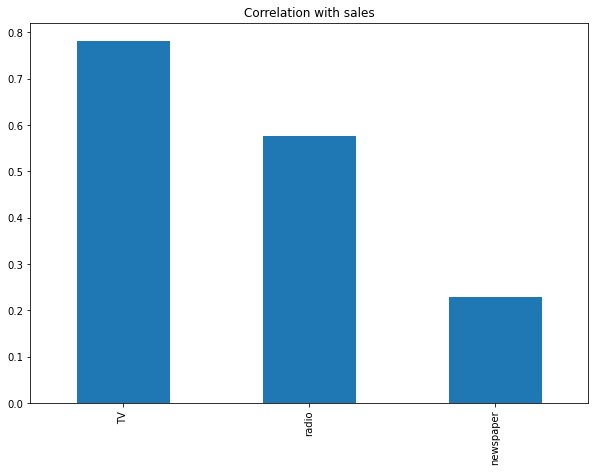

In [39]:
df.drop('sales',axis=1).corrwith(df.sales).plot(kind='bar',grid=False,figsize=(10,7),title='Correlation with sales')
plt.show()

Here, Tv,radio and newspaper are positively correlated and has good correlation with the sales column


# Checking Skewness:

In [40]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Skewness can be allowed with in the range f '+/-0.5'

Here,all the features are having less skewness value

# Checking outliers:

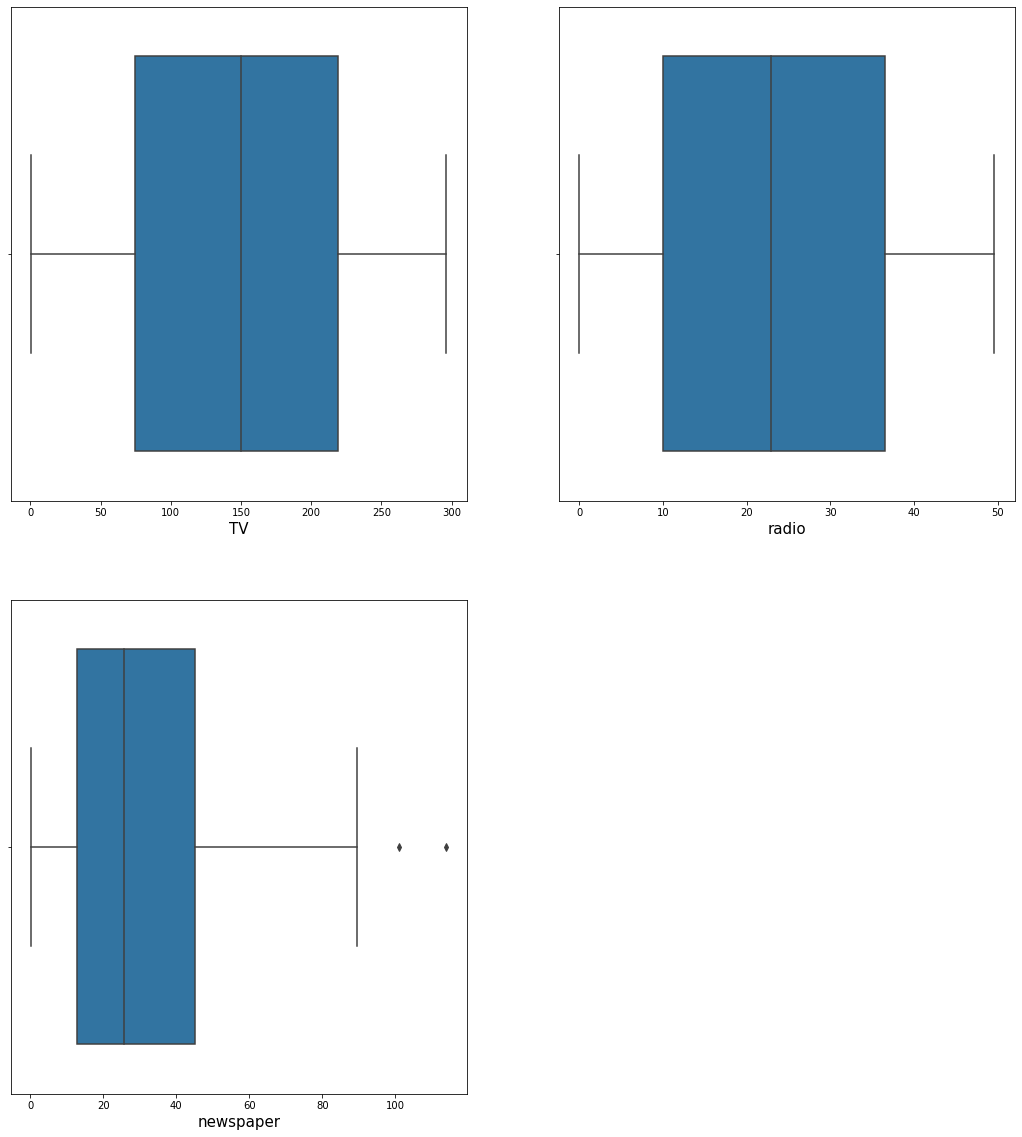

In [41]:
x=df.drop(columns=['sales'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=4:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()  

There seems to be no much outliers in the above plots. 

# Splitting the target and feature variables:

In [42]:
y=df['sales']
x=df.drop(columns=['sales'])

# Imporing Libraries Modeling the Data:

In [43]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Finding the Best Random State:

In [45]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f'At random state-{i},the training accuracy is -{r2_score(y_train,pred_train)}')
        print(f'At random state-{i},the testing accuracy is -{r2_score(y_test,pred_test)}')
        print('\n')


At random state-45,the training accuracy is -0.895947647524022
At random state-45,the testing accuracy is -0.8955882331233611




# Creating train-test split:

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)


# Linear Regression Model:

In [48]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)

0.8955882331233611

# CrossValidation Score:

In [49]:
training_accuracy=r2_score(y_train,pred_train)
testing_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    csv=cross_val_score(lr,x,y,cv=i)
    cv_mean=csv.mean()
    print('at cv:-',i)
    print('cv score-',cv_mean*100)
    print('training_accuracy-',training_accuracy*100)
    print('testing_accuracy-',testing_accuracy*100)

at cv:- 2
cv score- 89.08473589845056
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 3
cv score- 89.16464591145558
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 4
cv score- 89.00070660549507
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 5
cv score- 88.71063495438436
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 6
cv score- 88.99208882186672
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 7
cv score- 88.59930219823539
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 8
cv score- 88.26686689919153
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612
at cv:- 9
cv score- 88.22728227103586
training_accuracy- -77.07889820642204
testing_accuracy- 89.55882331233612


# Linear Regression Plot:

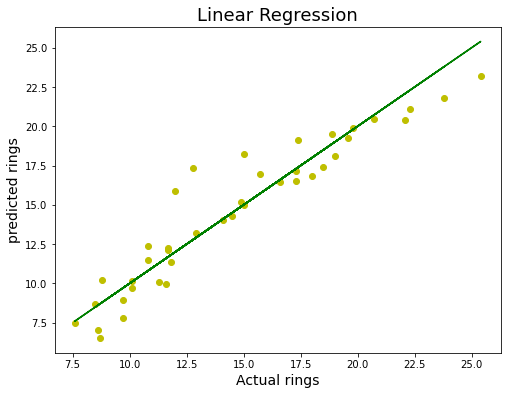

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularisation and HyperParameter Tuning:

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


# Lasso Regression :

In [55]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8955882301811618

In [56]:
csv=cross_val_score(ls,x,y,cv=3)
cv_mean=csv.mean()
cv_mean

0.8916465903375413

In Lasso Model r2score is 90% and cv score is 89% 

# Using Ensemble Approach:

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


# RandomForestRegression:

In [59]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=3)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  97.62320350947516
Cross validation Score:  97.44637266677705


In [ ]:
Since 

# Saving the model:

In [60]:
import pickle
filename='totalsalesprediction.pkl'
pickle.dump(rf,open(filename,'wb'))

# Loading the Pickle File and checking the Score:

In [61]:
loaded_model=pickle.load(open('totalsalesprediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9762320350947515


In [ ]:
#Conclusion:

Here, we are displaying Original and Predicted outcome:Rings

In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_conclusion=pd.DataFrame({'Original_sales':a,'Predicted_sales':predicted},index=range(len(a)))
df_conclusion

,Original_sales,Predicted_sales
0,14.9,16.044
1,8.8,8.335
2,16.6,16.631
3,23.8,22.846
4,12.0,12.113
5,9.7,10.051
6,19.0,19.235
7,11.8,11.809
8,18.5,18.186
9,8.5,7.742
